In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

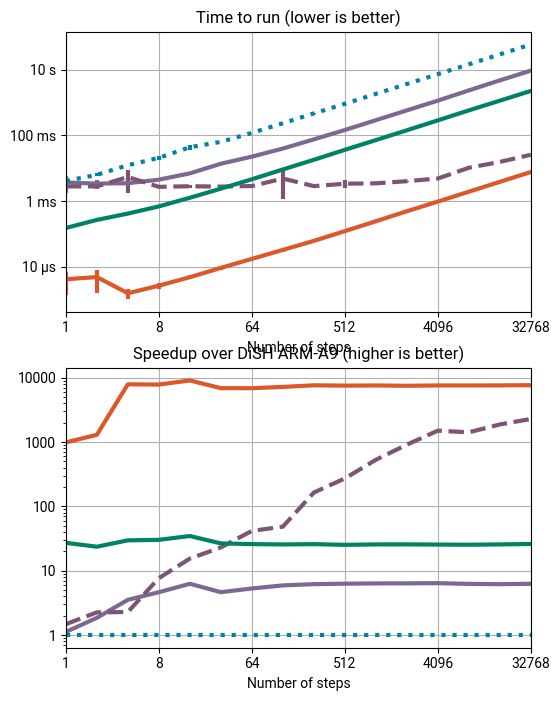

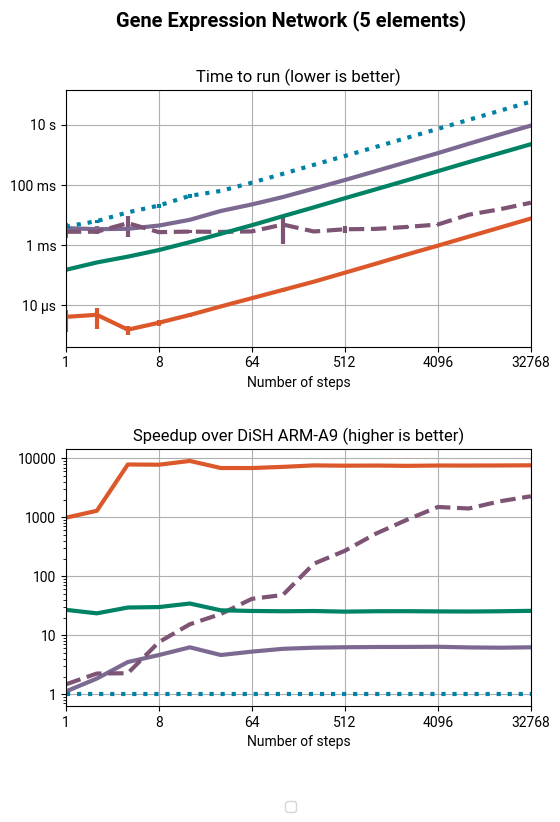

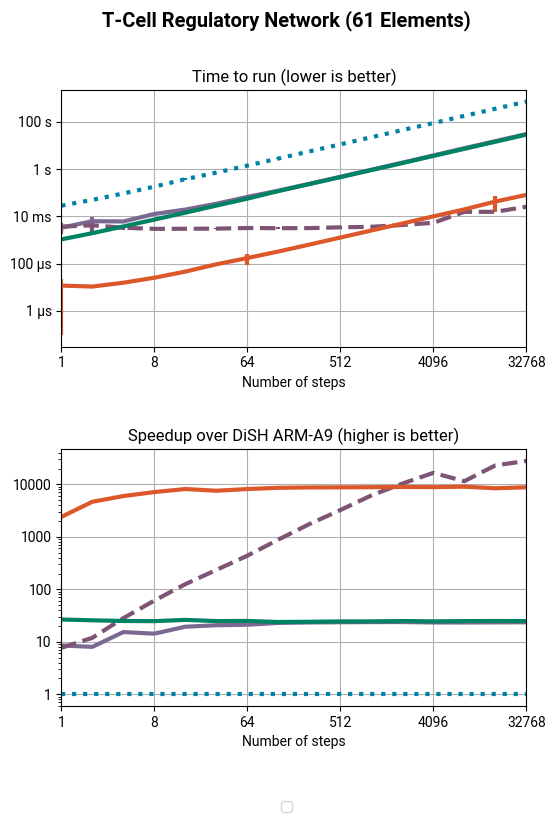

In [ ]:
import matplotlib.ticker as ticker

waltstyle = {
    'lines.linewidth': 3,
    'font.family': 'Roboto',
    'axes.prop_cycle': 
        plt.cycler(
            color     = ['#7c6992', '#7e5475', '#008264', '#dc582a', '#0081a6',],
            linestyle = ['-',       '--',      '-',       '-',       ':',],
        ),
}

for source, name in zip(['gene-exp-summary.csv',
                         'tcell-summary.csv'],
                        ['Gene Expression Network (5 elements)',
                         'T-Cell Regulatory Network (61 Elements)']):
    
    df = pd.read_csv(source, sep=',', header=0, index_col=0)
    with plt.style.context(waltstyle):

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8))
        ax1.loglog(df['fastdish_time'],         label='DiSHSOAP')
        ax1.loglog(df['fastdish_pickled_time'], label='DiSHSOAP (Efficient Save)')
        ax1.loglog(df['dish_intel_time'],       label='DiSH (Intel i5-8600K)')
        ax1.loglog(df['dishy_intel_time'],      label='DiSH-C (Intel i5-8600K)')
        ax1.loglog(df['dish_time'],             label='DiSH (ARM-A9)')

        ax1.set_title('Time to run (lower is better)')
        ax1.yaxis.set_major_formatter(ticker.EngFormatter(unit='s'))

        df['fastdish_norm']         = df['dish_time'] / df['fastdish_time']
        df['fastdish_pickled_norm'] = df['dish_time'] / df['fastdish_pickled_time']
        df['dish_intel_norm']       = df['dish_time'] / df['dish_intel_time']
        df['dishy_intel_norm']      = df['dish_time'] / df['dishy_intel_time']
        df['dish_norm']             = df['dish_time'] / df['dish_time']

        ax2.loglog(df['fastdish_norm'],         label='DiSHSOAP')
        ax2.loglog(df['fastdish_pickled_norm'], label='DiSHSOAP (Efficient Save)')
        ax2.loglog(df['dish_intel_norm'],       label='DiSH (Intel i5-8600K)')
        ax2.loglog(df['dishy_intel_norm'],      label='DiSH-C (Intel i5-8600K)')
        ax2.loglog(df['dish_norm'],             label='DiSH (ARM-A9)')

        ax2.set_title('Speedup over DiSH ARM-A9 (higher is better)')
        ax2.yaxis.set_major_formatter(ticker.ScalarFormatter())

        for ax in (ax1, ax2):
            ax.grid(which='major')
            ax.set_xlabel('Number of steps')
            ax.set_xticks([2**i for i in range(0,16,3)], minor=False)
            ax.set_xticks([], minor=True)
            ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
            ax.set_xlim(1,2**15)

        fig.legend(
            handles = [ax1.lines[i] for i in range(len(ax1.lines))],
            bbox_to_anchor = (0.5, 0.0), loc = 'upper center', # anchor is at bottom
            ncol=3
        )

        fig.subplots_adjust(hspace=0.4)
        fig.suptitle(name, fontsize='x-large', fontweight='semibold')

        plt.savefig(source[:-11] + 'plots.pdf', bbox_inches='tight')
        plt.show()